In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HomeA-meter4_2016.csv', parse_dates=True, index_col=0)

# Assuming the first column is the timestamp and the rest are device usages,
# you can sum these usages to get total energy demand
df['Total Demand'] = df.sum(axis=1)

# Check the first few rows to verify everything looks correct
print(df.head())


                     use [kW]  gen [kW]  KitchenDenLights [kW]  \
Date & Time                                                      
2016-01-01 00:00:00       0.0       0.0               0.007658   
2016-01-01 00:15:00       0.0       0.0               0.007607   
2016-01-01 00:30:00       0.0       0.0               0.007591   
2016-01-01 00:45:00       0.0       0.0               0.007613   
2016-01-01 01:00:00       0.0       0.0               0.007593   

                     MasterBedBathLights [kW]  MasterOutlets [kW]  \
Date & Time                                                         
2016-01-01 00:00:00                  0.021299            0.021406   
2016-01-01 00:15:00                  0.004709            0.021479   
2016-01-01 00:30:00                  0.004656            0.020737   
2016-01-01 00:45:00                  0.004643            0.020870   
2016-01-01 01:00:00                  0.004641            0.020090   

                     DenOutdoorLights [kW]  DenOutlet

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502743 entries, 2016-01-01 00:00:00 to 2016-12-31 23:59:00
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   use [kW]                          502743 non-null  float64
 1   gen [kW]                          502743 non-null  float64
 2   KitchenDenLights [kW]             502743 non-null  float64
 3   MasterBedBathLights [kW]          502743 non-null  float64
 4   MasterOutlets [kW]                502743 non-null  float64
 5   DenOutdoorLights [kW]             502743 non-null  float64
 6   DenOutlets [kW]                   502743 non-null  float64
 7   RearBasementLights [kW]           502743 non-null  float64
 8   KitchenOutletsEast [kW]           502743 non-null  float64
 9   KitchenOutletsSouth [kW]          502743 non-null  float64
 10  DishwasherDisposalSinkLight [kW]  502743 non-null  float64
 11  Refrigerator [kW] 

In [17]:
# Convert index to datetime if it isn't already
df.index = pd.to_datetime(df.index)

# Resample data to hourly, taking the mean for each hour
df_hourly = df.resample('H').mean()

# Explicitly set the frequency of the resampled DataFrame's index
df_hourly.index.freq = 'H'

df_hourly.dropna(inplace=True)

# You can then check if resampling has filled all the gaps
df_hourly.head()

,use [kW],gen [kW],KitchenDenLights [kW],MasterBedBathLights [kW],MasterOutlets [kW],DenOutdoorLights [kW],DenOutlets [kW],RearBasementLights [kW],KitchenOutletsEast [kW],KitchenOutletsSouth [kW],DishwasherDisposalSinkLight [kW],Refrigerator [kW],Microwave [kW],OfficeLights [kW],Total Demand
Date & Time,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.0,0.0,0.007617,0.008827,0.021123,0.000479,0.002344,0.001920,0.003737,0.005727,0.002158,0.108923,0.004752,0.068949,0.236557
2016-01-01 01:00:00,0.0,0.0,0.007612,0.004985,0.015389,0.000499,0.002374,0.001927,0.003695,0.005746,0.002160,0.107577,0.004783,0.069007,0.225754
2016-01-01 02:00:00,0.0,0.0,0.007634,0.005344,0.009302,0.000502,0.002393,0.001940,0.003685,0.005795,0.002173,0.089925,0.004789,0.067991,0.201471
2016-01-01 03:00:00,0.0,0.0,0.007634,0.004668,0.008817,0.000500,0.002392,0.001940,0.003669,0.005806,0.002176,0.077471,0.004773,0.068406,0.188254
2016-01-01 04:00:00,0.0,0.0,0.007625,0.004669,0.008579,0.000500,0.002376,0.001934,0.003690,0.005807,0.002167,0.102946,0.004789,0.068051,0.213134


In [18]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8783 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   use [kW]                          8783 non-null   float64
 1   gen [kW]                          8783 non-null   float64
 2   KitchenDenLights [kW]             8783 non-null   float64
 3   MasterBedBathLights [kW]          8783 non-null   float64
 4   MasterOutlets [kW]                8783 non-null   float64
 5   DenOutdoorLights [kW]             8783 non-null   float64
 6   DenOutlets [kW]                   8783 non-null   float64
 7   RearBasementLights [kW]           8783 non-null   float64
 8   KitchenOutletsEast [kW]           8783 non-null   float64
 9   KitchenOutletsSouth [kW]          8783 non-null   float64
 10  DishwasherDisposalSinkLight [kW]  8783 non-null   float64
 11  Refrigerator [kW]                

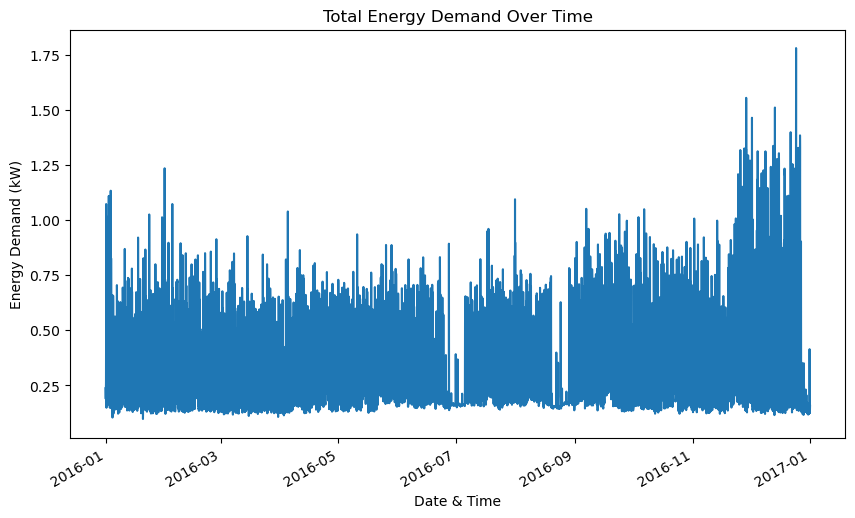

In [19]:
import matplotlib.pyplot as plt

# Plot the total energy demand
df_hourly['Total Demand'].plot(figsize=(10, 6))
plt.ylabel('Energy Demand (kW)')
plt.title('Total Energy Demand Over Time')
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_hourly['Total Demand'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation
if result[1] > 0.05:
    print("The series is not stationary.")
else:
    print("The series is stationary.")



ADF Statistic: -7.894706
p-value: 0.000000
The series is stationary.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total Demand   No. Observations:                 8783
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3599.980
Date:                Tue, 20 Feb 2024   AIC                          -7191.960
Time:                        19:47:03   BIC                          -7163.638
Sample:                             0   HQIC                         -7182.311
                               - 8783                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3215      0.006     53.248      0.000       0.310       0.333
ar.L1          0.5203      0.011     49.447      0.000       0.500       0.541
ma.L1          0.2103      0.012     16.852      0.0

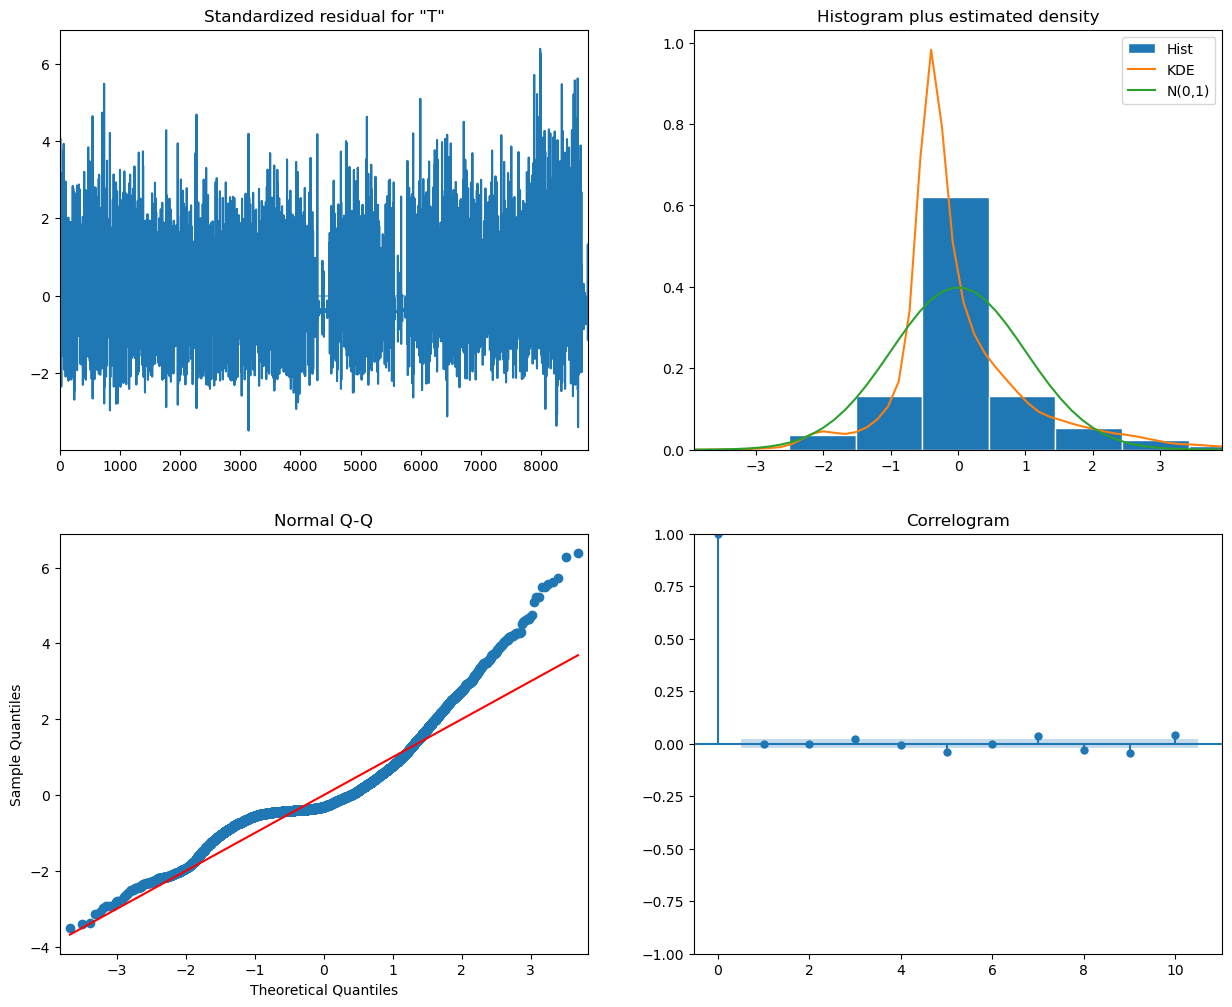

In [21]:
from statsmodels.tsa.arima.model import ARIMA



# Assuming the series is stationary or you've differenced it to achieve stationarity
# Replace p, d, q with your chosen parameters
p, d, q = 1, 0, 1  
model = ARIMA(df_hourly['Total Demand'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


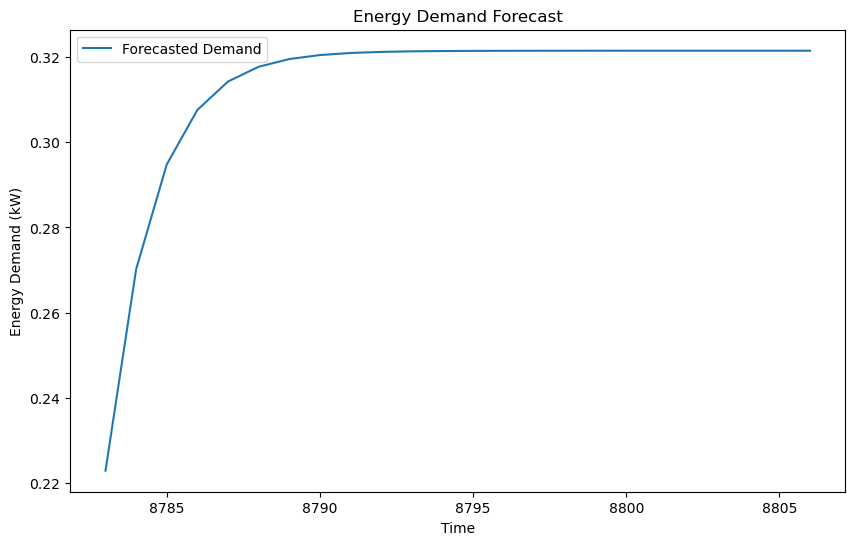

In [22]:
forecast = model_fit.forecast(steps=24)  # Example: Forecasting the next 24 hours

# Optional: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Forecasted Demand')
plt.title('Energy Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Demand (kW)')
plt.legend()
plt.show()

In [61]:
# Load the dataset
df = pd.read_csv('HomeA-meter4_2016.csv', parse_dates=True, index_col=0)

df['Total Demand'] = df.sum(axis=1)

# Convert index to datetime if it isn't already
df.index = pd.to_datetime(df.index)

# Resample data to weekly, taking the mean for each week
df_weekly = df.resample('W').mean()
# Explicitly set the index frequency to weekly
df_weekly.index.freq = 'W'
df_weekly.dropna(inplace=True)

In [62]:
# Plot the total energy demand
df_weekly['Total Demand'].plot(figsize=(10, 6))
plt.ylabel('Energy Demand (kW)')
plt.title('Total Energy Demand Over Time')
plt.show()

KeyError: 'Total Demand'

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_weekly['Total Demand'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation
if result[1] > 0.05:
    print("The series is not stationary, consider differencing.")
else:
    print("The series is stationary.")


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming the series is stationary or you've differenced it to achieve stationarity
# Replace p, d, q with your chosen parameters
p, d, q = 1, 1, 1  # Example parameters
model = ARIMA(df_weekly['Total Demand'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
forecast = model_fit.forecast(steps=4)  # Example: Forecasting the next 4 weeks

# Optional: Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(forecast, label='Forecasted Demand')
plt.title('Energy Demand Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Demand (kW)')
plt.legend()
plt.show()

In [42]:
df = pd.read_csv('HomeA-meter4_2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502743 entries, 0 to 502742
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date & Time                       502743 non-null  object 
 1   use [kW]                          502743 non-null  float64
 2   gen [kW]                          502743 non-null  float64
 3   KitchenDenLights [kW]             502743 non-null  float64
 4   MasterBedBathLights [kW]          502743 non-null  float64
 5   MasterOutlets [kW]                502743 non-null  float64
 6   DenOutdoorLights [kW]             502743 non-null  float64
 7   DenOutlets [kW]                   502743 non-null  float64
 8   RearBasementLights [kW]           502743 non-null  float64
 9   KitchenOutletsEast [kW]           502743 non-null  float64
 10  KitchenOutletsSouth [kW]          502743 non-null  float64
 11  DishwasherDisposalSinkLight [kW]  502743 non-null  f

In [49]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   --- ----------------------------------- 61.4/614.7 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.5 MB/s eta 0:00:00
   --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=766.409, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=761.183, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=762.066, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=761.785, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=760.316, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.623 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -379.158
Date:                Tue, 20 Feb 2024   AIC                            760.316
Time:                        21:05:04   BIC                            762.187
Sample:                    01-03-2016   HQIC                           761.023
                    

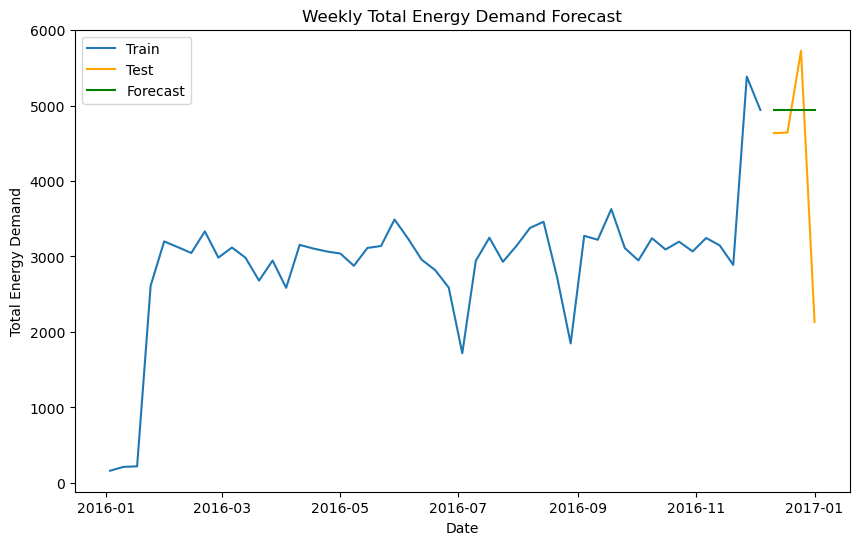

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt


# Load the data
file_path = 'HomeA-meter4_2016.csv'
df = pd.read_csv(file_path, parse_dates=['Date & Time'], index_col='Date & Time')

# Create 'Total Energy Demand' column

df['Total Energy Demand'] = df.drop(columns=['use [kW]', 'gen [kW]']).sum(axis=1)
# Assuming df is your DataFrame after loading and preprocessing
df_weekly = df['Total Energy Demand'].resample('W').sum()

# Ensure there's enough data to split into train and test
if len(df_weekly) < 30:  # threshold to ensure enough data points
    print("Not enough data points for meaningful modeling.")
else:
    # Splitting the data into train and test sets
    n_test = 4  # number of data points to withhold for testing
    train, test = df_weekly[:-n_test], df_weekly[-n_test:]

    # Using auto_arima to find the best ARIMA parameters, ignoring seasonal components
    auto_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True,
                            error_action="ignore", max_order=None, trace=True)

    print(auto_model.summary())

    # Fit ARIMA model (auto_arima wraps the ARIMA model and fits it to the data)
    # The best fitted model is returned by auto_arima
    model_fit = auto_model.fit(train)

    # Forecast
    forecast = model_fit.predict(n_periods=n_test)

    # Evaluation
    rmse = sqrt(mean_squared_error(test, forecast))
    print(f'Test RMSE: {rmse}')

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, color='orange', label='Test')
    plt.plot(test.index, forecast, color='green', label='Forecast')
    plt.title('Weekly Total Energy Demand Forecast')
    plt.xlabel('Date')
    plt.ylabel('Total Energy Demand')
    plt.legend()
    plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=808.249, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=809.275, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=808.769, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=807.698, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.540 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -402.849
Date:                Wed, 21 Feb 2024   AIC                            807.698
Time:                        17:22:34   BIC                            809.630
Sample:                    01-03-2016   HQIC                           808.436
                        

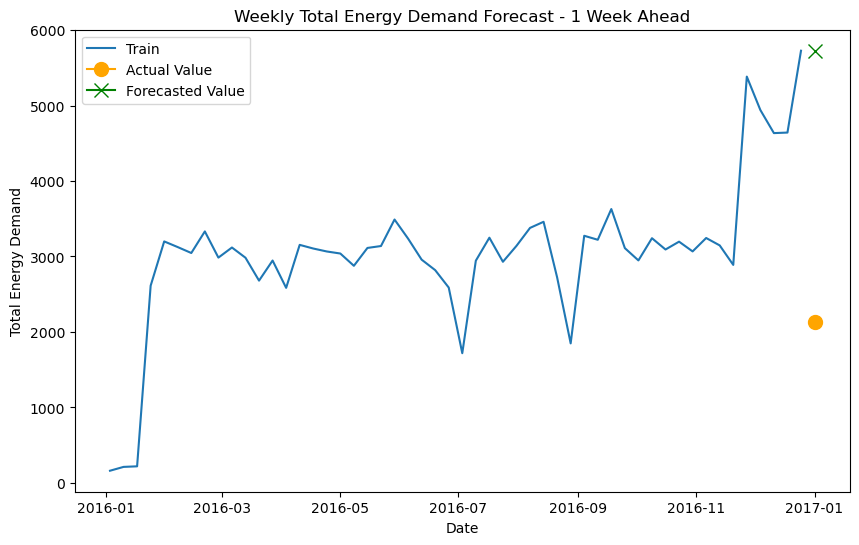

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

file_path = 'HomeA-meter4_2016.csv'
df = pd.read_csv(file_path, parse_dates=['Date & Time'], index_col='Date & Time')

df['Total Energy Demand'] = df.drop(columns=['use [kW]', 'gen [kW]']).sum(axis=1)

# Assuming df is your DataFrame after loading and preprocessing
df_weekly = df['Total Energy Demand'].resample('W').sum()

# Ensure there's enough data to split into train and test
if len(df_weekly) < 30:
    print("Not enough data points for meaningful modeling.")
else:
    # Splitting the data into train and test sets for forecasting 1 week into the future
    n_test = 1  # Adjusted for 1 week
    train, test = df_weekly[:-n_test], df_weekly[-n_test:]

    # Using auto_arima to find the best ARIMA parameters, ignoring seasonal components
    auto_model = auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True,
                            error_action="ignore", max_order=None, trace=True)

    print(auto_model.summary())

    # Fit ARIMA model
    model_fit = auto_model.fit(train)

    # Forecast for 1 week
    forecast = model_fit.predict(n_periods=n_test)

    # Evaluation for 1 week
    rmse = sqrt(mean_squared_error(test, forecast))
    print(f'Test RMSE for 1 week forecast: {rmse}')

    # Visualization for 1 week forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, color='orange', markersize=10, label='Actual Value', marker='o')  # Highlight actual value
    plt.plot(test.index, forecast, color='green', marker='x', markersize=10, label='Forecasted Value')  # Highlight forecast value
    plt.title('Weekly Total Energy Demand Forecast - 1 Week Ahead')
    plt.xlabel('Date')
    plt.ylabel('Total Energy Demand')
    plt.legend()
    plt.show()
